In [27]:
# load libraries and set plot parameters
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json
#import charts
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import YouTubeVideo

In [28]:
db_info = {
    'user': 'root',
    'password': '',
    'db': 'starz_dw',
    'host': 'localhost'
}

In [29]:
#sql = """select spend, conversions from starz_hourly_ads_data where adset_id='fb_23842890059610386'"""

sql = """select datetime, spend, conversions, cpa from starz_hourly_ads_data where adset_id='fb_23842874792860386' and conversions > 0"""

data = pd.read_sql(sql, 'mysql+mysqldb://{user}:{pwd}@{host}/{db}'.format(
        user=db_info['user'],
        pwd=db_info['password'],
        host=db_info['host'],
        db=db_info['db']
    ))

data.dropna()

,datetime,spend,conversions,cpa
0,2018-06-15 00:00:00,78.70,1,78.70
1,2018-06-15 00:00:00,14.66,1,14.66
2,2018-06-15 02:00:00,138.84,1,138.84
3,2018-06-15 02:00:00,117.44,1,117.44
4,2018-06-15 02:00:00,23.36,2,11.68
5,2018-06-15 03:00:00,11.38,2,5.69
6,2018-06-15 03:00:00,66.92,1,66.92
7,2018-06-15 04:00:00,27.56,1,27.56
8,2018-06-15 04:00:00,145.00,1,145.00
9,2018-06-15 06:00:00,28.40,1,28.40


In [30]:
def generate_json_data(result_data, values):
    """
    Generate json data for external graphs
    """

    new_data = {
        'title': "Hackathon - CPA Prediction by Hackerman",
        'labels': {
             'x': 'Spend',
             'y': 'Conversions'
        },
        "values": values,
        "data": {
             'x': list(sorted(result_data.keys())),
             'y': [result_data[item] for item in list(sorted(result_data.keys()))]
        }
    }
    
    return new_data

In [31]:
# attributes and dependent variables
X = data[['spend']]
y = data['conversions']

# training and test dataset (30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=38)

# training algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# see attributes coefficients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

# predict test dataset!
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual Spend': y_test, 'Predicted Conversions': y_pred})

# x for x in some_list
# predict new dataset
new_entry = [{'spend': val} for val in range(0, 1000100, 100)]
new_dataset = pd.DataFrame(new_entry)
new_pred = regressor.predict(new_dataset)

In [32]:
# see attributes coefficients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

       Coefficient
spend     0.051167


In [33]:
print("Spend Prediction")
print("=================================================")
result_data = {}
for n, data in enumerate(new_entry):
    result_data[data['spend']] = round(new_pred[n], 2)
    print("{}: {}".format(data['spend'], round(new_pred[n], 2)))

print("=================================================")

# accuracy score
score = regressor.score(X_test, y_test)
print("Accuracy score: {}%".format(round(score * 100)))

values = {
    'MAE': round(metrics.mean_absolute_error(y_test, y_pred), 2),
    'MSE': round(metrics.mean_squared_error(y_test, y_pred), 2),
    'RMSE': round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2),
    'ACCURACY_SCORE': round(score * 100)
}

# evauate algorithm
print('Mean Absolute Error: {}'.format(values['MAE']))
print('Mean Squared Error: {}'.format(values['MSE']))
print('Root Mean Squared Error: {}'.format(values['RMSE']))
print("=================================================")

Spend Prediction
0: 2.36
100: 7.48
200: 12.59
300: 17.71
400: 22.83
500: 27.94
600: 33.06
700: 38.18
800: 43.29
900: 48.41
1000: 53.53
1100: 58.64
1200: 63.76
1300: 68.88
1400: 73.99
1500: 79.11
1600: 84.23
1700: 89.34
1800: 94.46
1900: 99.58
2000: 104.69
2100: 109.81
2200: 114.93
2300: 120.04
2400: 125.16
2500: 130.28
2600: 135.39
2700: 140.51
2800: 145.63
2900: 150.74
3000: 155.86
3100: 160.98
3200: 166.09
3300: 171.21
3400: 176.33
3500: 181.44
3600: 186.56
3700: 191.68
3800: 196.79
3900: 201.91
4000: 207.03
4100: 212.14
4200: 217.26
4300: 222.38
4400: 227.49
4500: 232.61
4600: 237.73
4700: 242.84
4800: 247.96
4900: 253.08
5000: 258.19
5100: 263.31
5200: 268.43
5300: 273.54
5400: 278.66
5500: 283.78
5600: 288.89
5700: 294.01
5800: 299.13
5900: 304.24
6000: 309.36
6100: 314.48
6200: 319.59
6300: 324.71
6400: 329.83
6500: 334.94
6600: 340.06
6700: 345.18
6800: 350.29
6900: 355.41
7000: 360.53
7100: 365.65
7200: 370.76
7300: 375.88
7400: 381.0
7500: 386.11
7600: 391.23
7700: 396.35
7800

173900: 8900.31
174000: 8905.43
174100: 8910.55
174200: 8915.66
174300: 8920.78
174400: 8925.9
174500: 8931.01
174600: 8936.13
174700: 8941.25
174800: 8946.36
174900: 8951.48
175000: 8956.6
175100: 8961.71
175200: 8966.83
175300: 8971.95
175400: 8977.06
175500: 8982.18
175600: 8987.3
175700: 8992.41
175800: 8997.53
175900: 9002.65
176000: 9007.76
176100: 9012.88
176200: 9018.0
176300: 9023.11
176400: 9028.23
176500: 9033.35
176600: 9038.46
176700: 9043.58
176800: 9048.7
176900: 9053.81
177000: 9058.93
177100: 9064.05
177200: 9069.16
177300: 9074.28
177400: 9079.4
177500: 9084.51
177600: 9089.63
177700: 9094.75
177800: 9099.86
177900: 9104.98
178000: 9110.1
178100: 9115.21
178200: 9120.33
178300: 9125.45
178400: 9130.56
178500: 9135.68
178600: 9140.8
178700: 9145.91
178800: 9151.03
178900: 9156.15
179000: 9161.26
179100: 9166.38
179200: 9171.5
179300: 9176.61
179400: 9181.73
179500: 9186.85
179600: 9191.96
179700: 9197.08
179800: 9202.2
179900: 9207.31
180000: 9212.43
180100: 9217.55
18

323900: 16575.37
324000: 16580.49
324100: 16585.61
324200: 16590.72
324300: 16595.84
324400: 16600.96
324500: 16606.07
324600: 16611.19
324700: 16616.31
324800: 16621.42
324900: 16626.54
325000: 16631.66
325100: 16636.77
325200: 16641.89
325300: 16647.01
325400: 16652.12
325500: 16657.24
325600: 16662.36
325700: 16667.47
325800: 16672.59
325900: 16677.71
326000: 16682.82
326100: 16687.94
326200: 16693.06
326300: 16698.17
326400: 16703.29
326500: 16708.41
326600: 16713.52
326700: 16718.64
326800: 16723.76
326900: 16728.87
327000: 16733.99
327100: 16739.11
327200: 16744.22
327300: 16749.34
327400: 16754.46
327500: 16759.57
327600: 16764.69
327700: 16769.81
327800: 16774.92
327900: 16780.04
328000: 16785.16
328100: 16790.27
328200: 16795.39
328300: 16800.51
328400: 16805.62
328500: 16810.74
328600: 16815.86
328700: 16820.97
328800: 16826.09
328900: 16831.21
329000: 16836.32
329100: 16841.44
329200: 16846.56
329300: 16851.67
329400: 16856.79
329500: 16861.91
329600: 16867.02
329700: 16872.

473800: 24245.31
473900: 24250.43
474000: 24255.55
474100: 24260.67
474200: 24265.78
474300: 24270.9
474400: 24276.02
474500: 24281.13
474600: 24286.25
474700: 24291.37
474800: 24296.48
474900: 24301.6
475000: 24306.72
475100: 24311.83
475200: 24316.95
475300: 24322.07
475400: 24327.18
475500: 24332.3
475600: 24337.42
475700: 24342.53
475800: 24347.65
475900: 24352.77
476000: 24357.88
476100: 24363.0
476200: 24368.12
476300: 24373.23
476400: 24378.35
476500: 24383.47
476600: 24388.58
476700: 24393.7
476800: 24398.82
476900: 24403.93
477000: 24409.05
477100: 24414.17
477200: 24419.28
477300: 24424.4
477400: 24429.52
477500: 24434.63
477600: 24439.75
477700: 24444.87
477800: 24449.98
477900: 24455.1
478000: 24460.22
478100: 24465.33
478200: 24470.45
478300: 24475.57
478400: 24480.68
478500: 24485.8
478600: 24490.92
478700: 24496.03
478800: 24501.15
478900: 24506.27
479000: 24511.38
479100: 24516.5
479200: 24521.62
479300: 24526.73
479400: 24531.85
479500: 24536.97
479600: 24542.08
479700

623800: 31920.37
623900: 31925.49
624000: 31930.61
624100: 31935.72
624200: 31940.84
624300: 31945.96
624400: 31951.08
624500: 31956.19
624600: 31961.31
624700: 31966.43
624800: 31971.54
624900: 31976.66
625000: 31981.78
625100: 31986.89
625200: 31992.01
625300: 31997.13
625400: 32002.24
625500: 32007.36
625600: 32012.48
625700: 32017.59
625800: 32022.71
625900: 32027.83
626000: 32032.94
626100: 32038.06
626200: 32043.18
626300: 32048.29
626400: 32053.41
626500: 32058.53
626600: 32063.64
626700: 32068.76
626800: 32073.88
626900: 32078.99
627000: 32084.11
627100: 32089.23
627200: 32094.34
627300: 32099.46
627400: 32104.58
627500: 32109.69
627600: 32114.81
627700: 32119.93
627800: 32125.04
627900: 32130.16
628000: 32135.28
628100: 32140.39
628200: 32145.51
628300: 32150.63
628400: 32155.74
628500: 32160.86
628600: 32165.98
628700: 32171.09
628800: 32176.21
628900: 32181.33
629000: 32186.44
629100: 32191.56
629200: 32196.68
629300: 32201.79
629400: 32206.91
629500: 32212.03
629600: 32217.

773700: 39590.32
773800: 39595.43
773900: 39600.55
774000: 39605.67
774100: 39610.78
774200: 39615.9
774300: 39621.02
774400: 39626.13
774500: 39631.25
774600: 39636.37
774700: 39641.49
774800: 39646.6
774900: 39651.72
775000: 39656.84
775100: 39661.95
775200: 39667.07
775300: 39672.19
775400: 39677.3
775500: 39682.42
775600: 39687.54
775700: 39692.65
775800: 39697.77
775900: 39702.89
776000: 39708.0
776100: 39713.12
776200: 39718.24
776300: 39723.35
776400: 39728.47
776500: 39733.59
776600: 39738.7
776700: 39743.82
776800: 39748.94
776900: 39754.05
777000: 39759.17
777100: 39764.29
777200: 39769.4
777300: 39774.52
777400: 39779.64
777500: 39784.75
777600: 39789.87
777700: 39794.99
777800: 39800.1
777900: 39805.22
778000: 39810.34
778100: 39815.45
778200: 39820.57
778300: 39825.69
778400: 39830.8
778500: 39835.92
778600: 39841.04
778700: 39846.15
778800: 39851.27
778900: 39856.39
779000: 39861.5
779100: 39866.62
779200: 39871.74
779300: 39876.85
779400: 39881.97
779500: 39887.09
779600

923700: 47265.38
923800: 47270.49
923900: 47275.61
924000: 47280.73
924100: 47285.84
924200: 47290.96
924300: 47296.08
924400: 47301.19
924500: 47306.31
924600: 47311.43
924700: 47316.55
924800: 47321.66
924900: 47326.78
925000: 47331.9
925100: 47337.01
925200: 47342.13
925300: 47347.25
925400: 47352.36
925500: 47357.48
925600: 47362.6
925700: 47367.71
925800: 47372.83
925900: 47377.95
926000: 47383.06
926100: 47388.18
926200: 47393.3
926300: 47398.41
926400: 47403.53
926500: 47408.65
926600: 47413.76
926700: 47418.88
926800: 47424.0
926900: 47429.11
927000: 47434.23
927100: 47439.35
927200: 47444.46
927300: 47449.58
927400: 47454.7
927500: 47459.81
927600: 47464.93
927700: 47470.05
927800: 47475.16
927900: 47480.28
928000: 47485.4
928100: 47490.51
928200: 47495.63
928300: 47500.75
928400: 47505.86
928500: 47510.98
928600: 47516.1
928700: 47521.21
928800: 47526.33
928900: 47531.45
929000: 47536.56
929100: 47541.68
929200: 47546.8
929300: 47551.91
929400: 47557.03
929500: 47562.15
92960

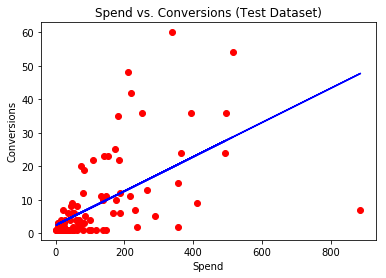

In [34]:
# dataset graph
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Spend vs. Conversions (Test Dataset)')
plt.xlabel('Spend')
plt.ylabel('Conversions')
plt.show()

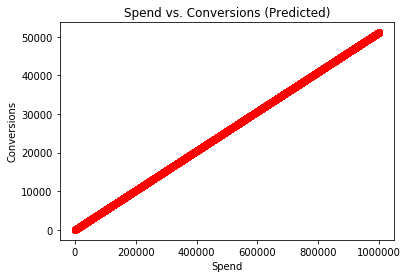

In [35]:
# dataset graph
plt.scatter(new_dataset['spend'].values, new_pred, color='red')
#plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Spend vs. Conversions (Predicted)')
plt.xlabel('Spend')
plt.ylabel('Conversions')
plt.show()

In [36]:
json_data = generate_json_data(result_data, values)

with open('hackerman_predictions.json', 'wt') as outfile:
    json.dump(json_data, outfile, ensure_ascii=False, indent=4, sort_keys=True)

In [37]:
# print(json.dumps(json_data, indent=4, sort_keys=True))

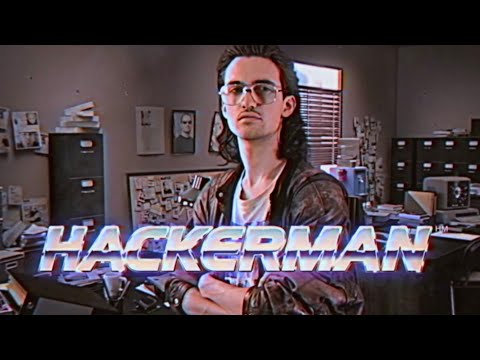

In [38]:
YouTubeVideo('KEkrWRHCDQU')